In [10]:
#add requiered python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, datetime
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import chi2_contingency, beta

In [11]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
# reuse existing module
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot_data import *

In [45]:
df = pd.read_csv('../data/AdSmartABdata.csv')

Explorate the data

In [36]:
#data overview
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [37]:
#data decription on numeric column
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [38]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [39]:
#columns' name of the dataframe
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

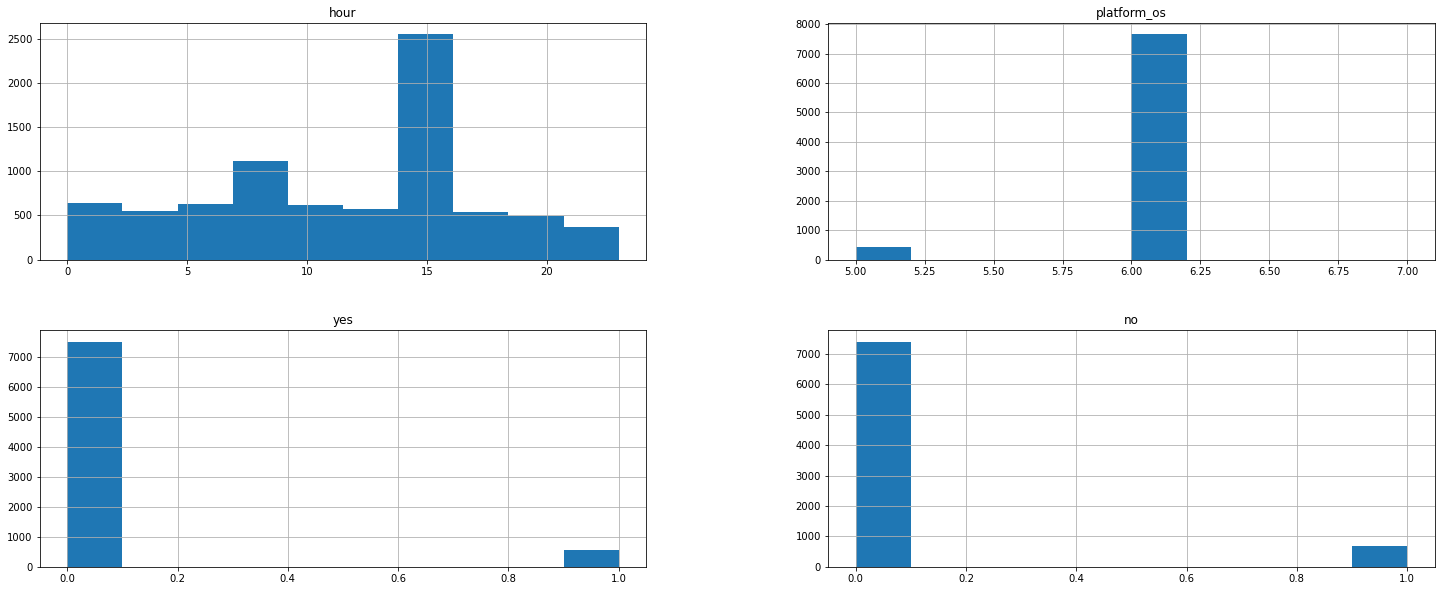

In [40]:
#visualize the given data
df.hist(bins=10, figsize=(25, 10))
plt.show()

In [41]:
# number of user completed the survey with a 'yes' or 'no'
df_yes = df[(df['experiment'] == 'exposed') & (df['yes']==1)].shape[0]
df_no = df[(df['experiment'] == 'exposed') & (df['no']==1)].shape[0]

In [42]:
print(df_yes)
print(df_no)

308
349


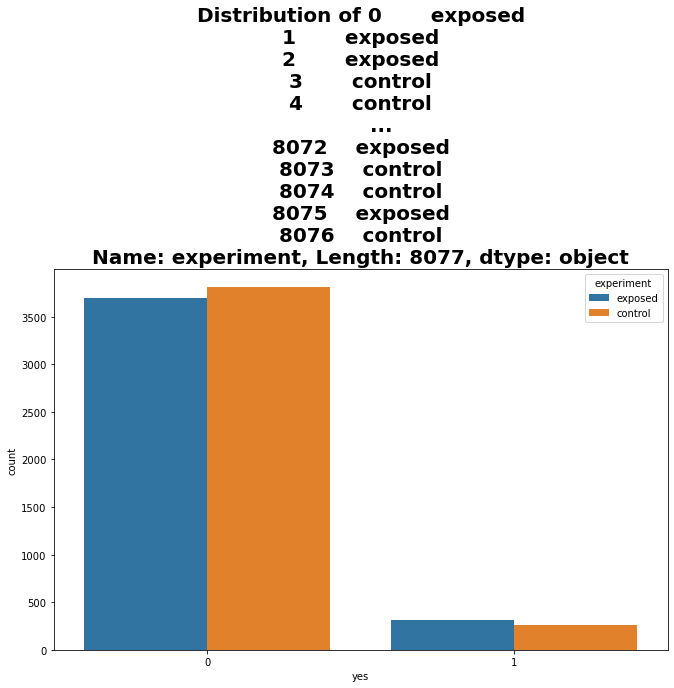

In [52]:
#plot the count of the column with yes
plot_count(df.yes, df.experiment)

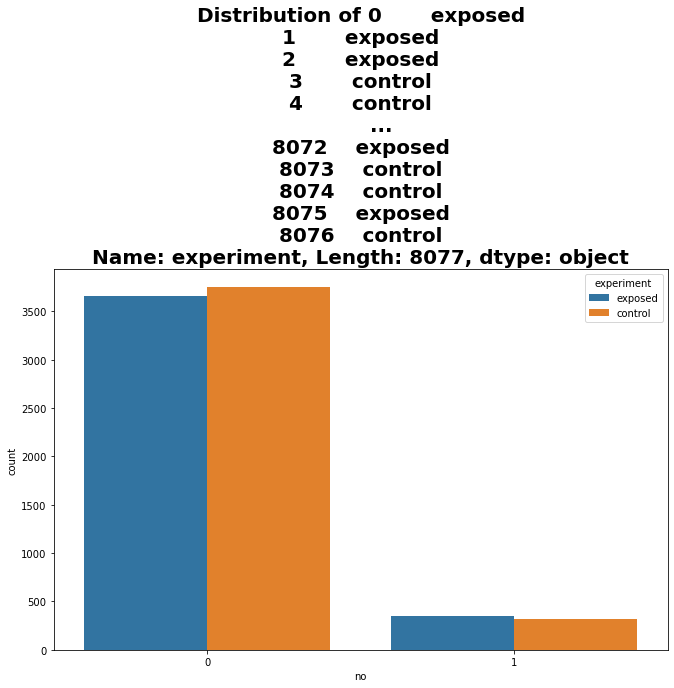

In [53]:
#plot the count of column with no
plot_count(df.no, df.experiment)

In [54]:
#number of unique users
print(f"Number of unique users in the experiment: {df['auction_id'].unique()}")


Number of unique users in the experiment: ['0008ef63-77a7-448b-bd1e-075f42c55e39'
 '000eabc5-17ce-4137-8efe-44734d914446'
 '0016d14a-ae18-4a02-a204-6ba53b52f2ed' ...
 'ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7'
 'ffeeed62-3f7c-4a6e-8ba7-95d303d40969'
 'fffbb9ff-568a-41a5-a0c3-6866592f80d8']
